# Clustering Assignment

1. What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.
- K-Means Clustering:
  * K-Means is a partition-based clustering algorithm. It partitions data into a predefined number of clusters (K), with each data point being assigned to the cluster whose centroid (mean) is the closest. It starts with K randomly initialized centroids, then iteratively assigns each data point to the nearest centroid and recalculates centroids until convergence.

  * Key Characteristics:
     * Input: You need to specify the number of clusters (K) beforehand.

     * Shape of Clusters: Best for spherical, equally sized clusters.

     * Complexity: Faster for large datasets, typically O(n * k * t), where n is the number of data points, k is the number of clusters, and t is the number of iterations.

     * Sensitivity: Sensitive to the initial placement of centroids and outliers.

  * Use Case for K-Means:
     * customer Segmentation: Imagine you’re working with a large e-commerce company and you want to group customers based on purchasing behavior. K-Means could help partition customers into K clusters where each group represents a different buying behavior. Since you know the number of segments you want, K-Means is a good choice.

   * Hierarchical Clustering:
      * Hierarchical clustering builds a tree of clusters, either by merging (agglomerative) or by splitting (divisive) them. It does not require the number of clusters to be specified in advance. The result is a hierarchy, usually represented as a dendrogram, which shows the distances at which clusters were merged or split.

   * Key Characteristics:
      * Input: No need to specify the number of clusters in advance.

      * Shape of Clusters: More flexible with cluster shapes, can handle irregularly shaped clusters.

      * Complexity: Slower and less scalable than K-Means, typically O(n²) in time complexity.

      * Sensitivity: More robust to outliers and does not rely on initial cluster centroids.

   * Use Case for Hierarchical Clustering:
      * Gene Expression Data: If you’re analyzing gene expression data to find which genes behave similarly across various conditions, hierarchical clustering is ideal because it can capture relationships in the data without needing a predefined number of clusters. You can explore different levels of similarity in the dendrogram to decide on the optimal grouping.    

2. Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.
- Silhouette Score in Clustering
   * The Silhouette Score is a metric used to evaluate the quality of clustering results. It measures how similar each point is to its own cluster (cohesion) compared to other clusters (separation). Essentially, it helps assess how well-defined and meaningful the clusters are after a clustering algorithm has been applied.

   * The Silhouette Score gives a numeric value between -1 and +1:
       * A score close to +1 indicates that the points are well clustered, meaning they are very similar to the points in their own cluster and well-separated from points in other clusters.

       * A score close to 0 suggests that the point is on or very close to the decision boundary between two neighboring clusters.

       * A score close to -1 indicates that the point is poorly clustered, meaning it may have been assigned to the wrong cluster.       

- How Silhouette Score is Calculated
  * For each data point i, the score is calculated using the following:
    
  * Cohesion (a(i)):
     * This is the average distance from point i to all other points in the same cluster. A smaller value means that the point is close to others in its cluster.  
     * a(i)=∣Ci​∣−11​j∈Ci​,j=i∑​d(i,j)
     * where Ci is the cluster of point i, and d(i,j) is the distance between points i and j.

  * Separation (b(i)):
     * This is the average distance from point i to all points in the nearest cluster that i is not a part of. A higher value indicates better separation between clusters.   
     * b(i)=Cj​=Ci​min​∣Cj​∣1​j∈Cj​∑​d(i,j)

  * Silhouette Score for Point i:   
     * Finally, the silhouette score for each point i is:
     * s(i)=max(a(i),b(i))b(i)−a(i)​
     * The score for the entire dataset is the average of the individual silhouette scores for all points:
     * S=n1​i=1∑n​s(i)

- Interpreting the Silhouette Score
   * High Silhouette Score (> 0.5):
      * If the average silhouette score is high (closer to 1), this suggests that the clustering is good. The data points are well-clustered, with both high cohesion within clusters and good separation between clusters.

   * Moderate Silhouette Score (around 0):
      * If the score is near 0, this indicates that points are not clearly assigned to a single cluster and could be equally well-placed in neighboring clusters.           

   * Low Silhouette Score (< 0):
      * A negative score suggests poor clustering, meaning that points may have been assigned to the wrong clusters and there is a lack of proper separation between clusters.   

3. What are the core parameters of DBSCAN, and how do they influence the
clustering process?      
- Core Parameters of DBSCAN and Their Influence on the Clustering Process
   * DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm, especially suited for identifying arbitrarily shaped clusters and handling noise (outliers). Unlike K-Means, DBSCAN does not require the number of clusters to be specified beforehand. Instead, it relies on density to form clusters, where clusters are defined as regions of high point density separated by regions of low point density.

   * Core Parameters of DBSCAN
   
   * Epsilon (ε) — eps:
      * Definition: This is the maximum radius of the neighborhood around a data point. It defines how far apart points can be to be considered as part of the same neighborhood or cluster.

      * Influence on Clustering:

      * Small ε: When the value of ε is small, only points that are very close together will be considered neighbors. This leads to a larger number of small, tight clusters and more points being labeled as noise.

      * Large ε: If ε is too large, DBSCAN might group together points that are not truly part of the same cluster, resulting in fewer, larger clusters, and potentially including outliers as part of a cluster.

      * Best Practice: A good value of ε is usually chosen based on the distribution of the data (often through domain knowledge or by using techniques like k-distance plots).

  * MinPts — min_samples:
      * Definition: This is the minimum number of points required to form a dense region (a cluster). In other words, a point is considered a "core point" if it has at least MinPts points (including itself) within its ε-neighborhood.

      * Influence on Clustering:

      * Small MinPts: If MinPts is set too low (e.g., 1 or 2), DBSCAN may form too many small clusters, even if the data points are not densely grouped. This can result in many points being labeled as core points and might lead to over-clustering.

      * Large MinPts: If MinPts is set too high, DBSCAN may fail to identify smaller clusters, and a lot of points that belong to a meaningful cluster might be labeled as noise or outliers.

      * Best Practice: The value of MinPts is often set to a value between 4 and 10, with a common heuristic being MinPts = D + 1, where D is the number of dimensions in the dataset.  

  * Core Points, Border Points, and Noise:
      * Core Points: Points that have at least MinPts neighbors within the ε-neighborhood. These points form the center of a cluster.

      * Border Points: Points that do not have enough neighbors to be core points, but they lie within the ε-neighborhood of a core point. They are on the "edges" of clusters.

      * Noise Points (Outliers): Points that do not meet the conditions to be core points or border points. These points are considered outliers and are not assigned to any cluster.      

- How These Parameters Influence Clustering
  * Epsilon (ε):
     * Too Small:

     * Results in many small clusters and high number of noise points because very few points will be close enough to form a dense region.

     * It may fail to recognize the global structure of the data and could treat the entire dataset as noise.

     * Too Large:

     * May merge different clusters that are actually distinct, leading to a single large cluster.

     * The algorithm may fail to capture meaningful subclusters, and points that should be outliers might be included as part of a cluster.      

  * MinPts:
     * Too Low:

     * The algorithm might over-cluster and create many tiny, dense clusters, possibly identifying noise points as valid clusters.

     * You might get many points being classified as core points, which isn't ideal if you are looking for larger, well-defined clusters.

     * Too High:

     * Fewer clusters might be formed, with many points marked as noise because they do not meet the MinPts threshold.

     * It may not recognize clusters that have a lower density but are still meaningful.    

- DBSCAN Behavior Based on Different Parameter Choices
   * Small ε and Small MinPts:

   * Results in many small clusters, each of which may consist of a few very dense points. Many points are likely to be labeled as noise.

   * Useful in detecting smaller groups in datasets with significant noise.

   * Large ε and Small MinPts:

   * Results in fewer clusters, with points that should be separated grouped into a single cluster. You risk merging different structures in the data into one large cluster.

   * Can be useful when the data is fairly dense and the clusters are well-separated.

   * Small ε and Large MinPts:

   * Results in very few or no clusters, as the points may not meet the criteria for core points.

   * May be appropriate in cases where you expect highly isolated clusters and few outliers.

   * Large ε and Large MinPts:

   * Results in fewer clusters and can be effective for detecting very large, dense clusters.

   * Likely to merge multiple distinct clusters into one or fail to identify smaller structures.   

- Selecting Optimal DBSCAN Parameters
  * Epsilon (ε):
     * A common method for selecting ε is to create a k-distance graph:

     * For each point in the dataset, compute the distance to its k-th nearest neighbor (where k is typically equal to MinPts).

     * Sort these distances and plot them. The "elbow" point in this plot often suggests a good value for ε, where the distance increases sharply (indicating the transition from dense regions to sparser regions).
  
  * MinPts:
     * For a 2D dataset, MinPts = 4 is a typical starting point.
     * For higher-dimensional data, a general rule of thumb is to set MinPts = D + 1, where D is the number of dimensions in the dataset.

4. Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?
- Why Feature Scaling is Important in Clustering Algorithms (K-Means and DBSCAN)
  * Feature scaling is a preprocessing step in machine learning that involves normalizing or standardizing the values of different features (variables) so that they are on a comparable scale. This is particularly important for clustering algorithms like K-Means and DBSCAN, which are sensitive to the magnitude of the features. Let's dive into the specific reasons why scaling is crucial for these algorithms:

  * K-Means Clustering     
     * How K-Means Works:
     * K-Means clustering works by assigning data points to the nearest centroid (mean) and iteratively updating centroids based on the points assigned to each cluster. The algorithm uses Euclidean distance to determine how close each point is to a centroid.

  * Impact of Feature Scaling on K-Means:
     * Euclidean Distance is Sensitive to Feature Magnitudes:
     * K-Means uses the Euclidean distance to assign points to clusters. The formula for Euclidean distance between two points x and y in an n-dimensional space is:     
     * d(x,y)=i=1∑n​(xi​−yi​)2
     * If one feature has a large scale (e.g., "income" in thousands) and another has a small scale (e.g., "age" in years), the distance calculation will be dominated by the feature with the larger scale. This can lead to biased clustering, where clusters are determined more by the large-scale features and less by the smaller-scale ones.

  * Influence on Centroid Calculation:
     * Since K-Means computes the mean of each cluster's points (i.e., the centroid), if the features are on different scales, the centroid will be heavily influenced by the features with larger magnitudes, which can distort the clustering process. Features with small values could be underrepresented in the calculation of centroids, affecting the quality of the clusters.

  * Example:
     * Imagine a dataset where:
     * Feature 1: "Age" (ranging from 10 to 100 years)
     * Feature 2: "Income" (ranging from $20,000 to $1,000,000)      
     * Without scaling, K-Means would give much more importance to "Income" when calculating distances and centroids, potentially causing clusters to form based on income rather than age or a combination of both features.
     * Solution:
     * Feature scaling (e.g., standardization or min-max normalization) ensures that all features contribute equally to the distance calculations. Standardizing features to have a mean of 0 and a standard deviation of 1, for example, ensures that all features are on the same scale.

- DBSCAN (Density-Based Clustering)
  * How DBSCAN Works:
     * DBSCAN groups points that are closely packed together (i.e., points within a certain ε-distance). It classifies points as core points, border points, or noise, based on their number of neighbors within the ε-neighborhood. DBSCAN uses Euclidean distance to define neighborhood proximity.

  * Impact of Feature Scaling on DBSCAN:
     * Distance Calculation is Affected by Scale:
     * Like K-Means, DBSCAN also relies on distance metrics (typically Euclidean distance) to determine whether points are in the same dense region (cluster). If features have different scales, the proximity calculation can be biased. A feature with a larger scale can dominate the distance measure, affecting how DBSCAN defines "dense regions" and, consequently, the clustering results.

  * Influence on ε (Epsilon):
     * DBSCAN uses the ε (epsilon) parameter to define the radius of the neighborhood around each point. If the features are not scaled, a small value of ε might capture a much larger or smaller region depending on the feature with the larger or smaller scale. This could lead to either too many points being labeled as noise or an inadequate number of points being clustered.

  * Example:
     * Suppose you have two features:
     * Feature 1: "Height" (measured in centimeters, ranging from 150 to 200)
     * Feature 2: "Weight" (measured in kilograms, ranging from 30 to 150)                 
     * Without scaling, the distance between two points based on height and weight could be heavily influenced by the weight feature because the scale of weight is much larger than the height feature.
     * Solution:
     * Feature scaling ensures that both features contribute equally to the distance measure. After scaling, each feature will have an equal influence on the ε-neighborhood, leading to more accurate clustering of points in dense regions.

5.  What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?
- The Elbow Method in K-Means Clustering
   * The Elbow Method is a heuristic used to determine the optimal number of clusters (K) for K-Means clustering. The idea is to find the point where increasing the number of clusters yields diminishing returns in terms of improving the within-cluster sum of squares (WCSS), also known as inertia.

- Key Concept:
   * WCSS (Within-Cluster Sum of Squares): This measures the compactness of the clusters. It is the sum of squared distances between each point and the centroid of its assigned cluster. Lower WCSS values indicate that the clusters are tight (i.e., points are close to their centroids).

- How the Elbow Method Works:
   * Run K-Means for Different Values of K:
      * You start by applying K-Means clustering to the data for a range of different K values (e.g., from 1 to 10 clusters). For each value of K, the algorithm calculates the WCSS.           

   * Plot the WCSS against K:
      * After running K-Means for each K, you plot the WCSS (y-axis) against the number of clusters K (x-axis). This creates a curve that typically decreases as the number of clusters increases (since more clusters lead to smaller distances between points and their centroids).    

   * Look for the "Elbow" Point:
      * The goal is to identify the point on the plot where the rate of decrease in WCSS slows down significantly. This point is often called the "elbow" because the graph typically forms an elbow-like shape (a sharp bend).

      * The "elbow" represents the optimal number of clusters, where adding more clusters doesn’t provide a significant reduction in WCSS. Essentially, the model starts to "overfit" by adding more clusters that do not meaningfully improve the clustering.   

- Steps in the Elbow Method:
   * Perform K-Means for a Range of K Values:
      * Run the K-Means algorithm for a set of K values (e.g., from 1 to 10).

   * Calculate WCSS for Each K:
      For each value of K, compute the WCSS (within-cluster sum of squares), which is:
      * WCSS=i=1∑N​k=1∑K​I(ci​=k)⋅∣∣xi​−μk​∣∣2
      * where 𝐼(ci=k) is an indicator function that equals 1 if point i belongs to cluster k, μk is the centroid of cluster k, and xi is the data point i.

   * Plot the WCSS Values:
      * Plot K values on the x-axis and the corresponding WCSS values on the y-axis.   
      
   * Find the Elbow:
      * Look for the "elbow" in the plot, where the curve begins to flatten out. The value of K at the elbow is considered the optimal number of clusters.   

- Why the Elbow Method Works:
   * Diminishing Returns in WCSS Reduction:
      * As K increases, the WCSS continues to decrease because the algorithm is dividing the data into more clusters, which naturally results in lower distances between points and their centroids. However, after a certain point, adding more clusters has less of an impact on improving the WCSS. The "elbow" indicates the point where further increases in K are no longer significant.      

   * Overfitting Risk:
      * If you choose K too large, the model may overfit the data, meaning it would capture noise or small variations that are not meaningful, leading to very small clusters that don't reflect the underlying structure of the data. The elbow helps to avoid this by choosing the point where the improvement in clustering quality starts to level off.   

5. What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?      
- Dataset:
- Use make_blobs, make_moons, and sklearn.datasets.load_wine() as
specified.

- The Elbow Method in K-Means Clustering
   * The Elbow Method is a popular heuristic used to determine the optimal number of clusters (K) in K-Means clustering. It works by plotting the Within-Cluster Sum of Squares (WCSS), also known as inertia, for different values of K and looking for a point where the rate of decrease in WCSS slows down significantly. This point, resembling an "elbow," represents the optimal number of clusters.

- Steps of the Elbow Method:
   * Run K-Means for multiple values of K (e.g., from 1 to 10).
   * Compute WCSS for each K.
   * Plot WCSS against K.
   * Identify the "elbow" point where adding more clusters results in minimal reduction in WCSS   
      * The idea is that increasing K will always decrease WCSS because with more clusters, each point is closer to its assigned cluster's centroid. However, at some point, adding more clusters results in only a small decrease in WCSS, indicating that further clustering is not providing significant improvements.

- Understanding the Dataset:
   * To demonstrate the Elbow Method in practice, we’ll use the following datasets:
      * make_blobs: A synthetic dataset for clustering with well-separated, spherical blobs.
      * make_moons: A synthetic dataset that creates two interlocking half-moon shapes, which are challenging for K-Means because the clusters are not spherical.
      * load_wine(): A real-world dataset about wine varieties, with several features, ideal for K-Means clustering.     

  * Step 1: Import Libraries and Datasets
       

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons, load_wine
import numpy as np


- Step 2: Generate Datasets


In [4]:
# 1. make_blobs
X_blobs, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# 2. make_moons
X_moons, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# 3. load_wine
wine = load_wine()
X_wine = wine.data


- Step 3: Apply the Elbow Method for Each Dataset


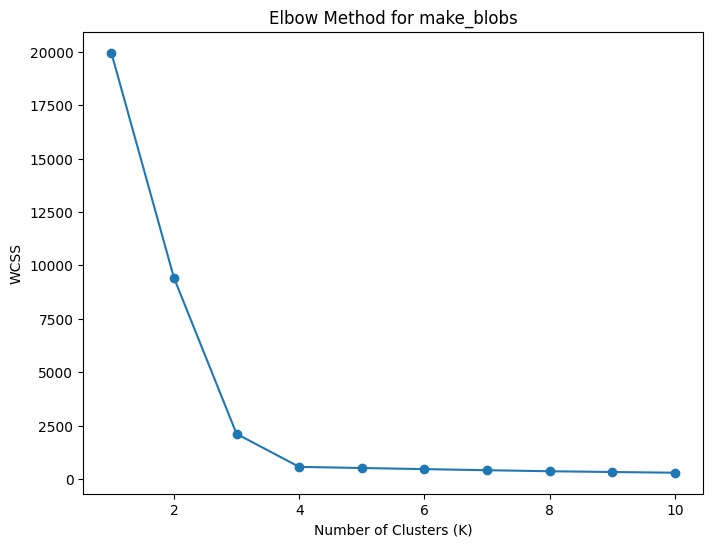

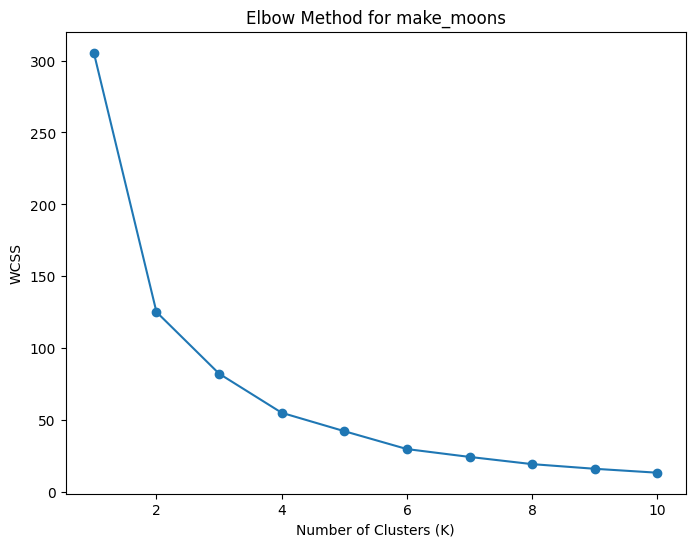

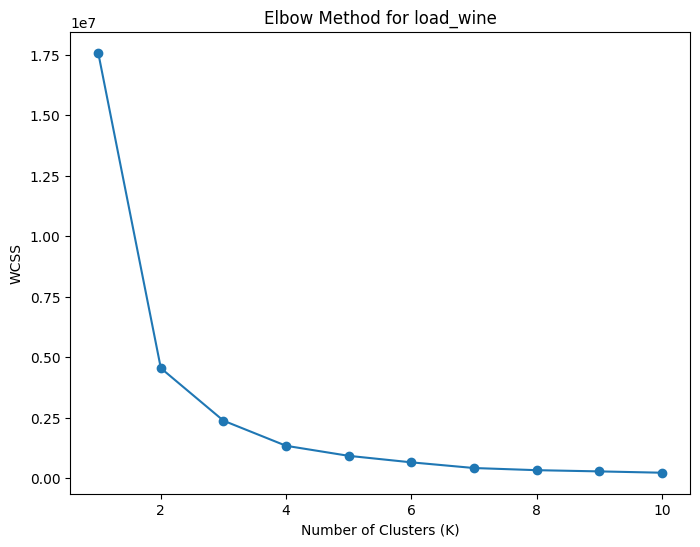

In [5]:
def plot_elbow_method(X, dataset_name):
    wcss = []
    # Try K from 1 to 10
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)  # WCSS is stored in inertia_

    # Plotting the Elbow Graph
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title(f"Elbow Method for {dataset_name}")
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("WCSS")
    plt.show()

# Apply Elbow Method on each dataset
plot_elbow_method(X_blobs, "make_blobs")
plot_elbow_method(X_moons, "make_moons")
plot_elbow_method(X_wine, "load_wine")


6. Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers.
- To generate synthetic data using make_blobs with n_samples=300 and centers=4, apply K-Means clustering, and visualize the results along with the cluster centers, you can follow the steps below. We'll use Python and matplotlib for visualization, and KMeans from sklearn for clustering.

- Steps:
   * Generate synthetic data using make_blobs.
   * Apply KMeans clustering to the data.
   * Visualize the clusters and plot the cluster centers

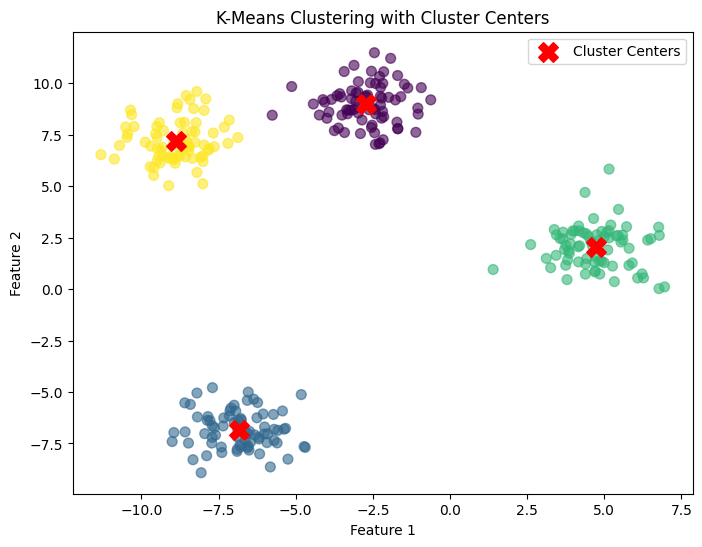

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X)

# Step 3: Visualize the clusters and cluster centers
plt.figure(figsize=(8, 6))

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6)

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')

# Labeling
plt.title('K-Means Clustering with Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Show the plot
plt.show()


7. Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
model. Print the number of clusters found (excluding noise).
- To apply DBSCAN to the Wine dataset after standardizing the features with StandardScaler, follow these steps:

- Steps:
   * Load the Wine dataset using sklearn.datasets.load_wine().
   * Standardize the features using StandardScaler.
   * Apply DBSCAN to the scaled data.
   * Print the number of clusters found (excluding noise).


Number of clusters (excluding noise): 0


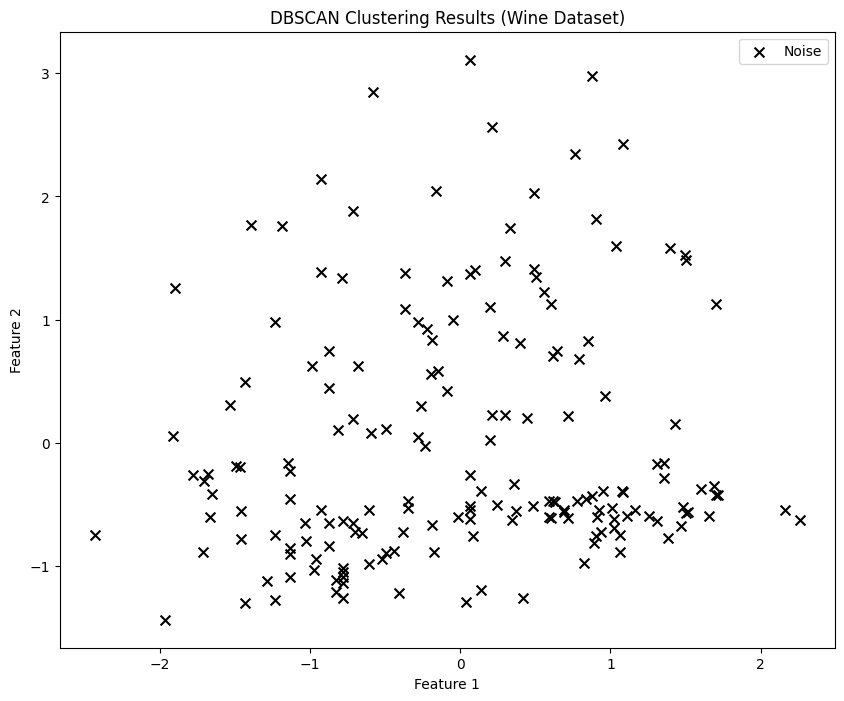

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data  # Features (independent variables)

# Step 2: Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust eps and min_samples as needed
dbscan.fit(X_scaled)

# Step 4: Get labels and clusters
labels = dbscan.labels_

# The DBSCAN algorithm assigns -1 to noise points
unique_labels = np.unique(labels)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

# Step 5: Print the number of clusters (excluding noise)
print(f"Number of clusters (excluding noise): {num_clusters}")

# Step 6: Plotting the clusters
plt.figure(figsize=(10, 8))

# Loop through the unique labels and plot the clusters
for label in unique_labels:
    # Select points that belong to this label (cluster)
    cluster_points = X_scaled[labels == label]

    # If the label is -1, it represents noise, plot with a different color (e.g., black)
    if label == -1:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c='black', marker='x', label='Noise')
    else:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, label=f"Cluster {label}")

# Adding labels and title
plt.title("DBSCAN Clustering Results (Wine Dataset)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Show the plot
plt.show()


8. Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.
- To generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN clustering, and highlight the outliers (noise points), we can follow these steps:
  
- Steps:
   * Generate moon-shaped data using make_moons.
   * Apply DBSCAN to the data.
   * Visualize the clusters and highlight the outliers (noise points labeled as -1 by DBSCAN).   

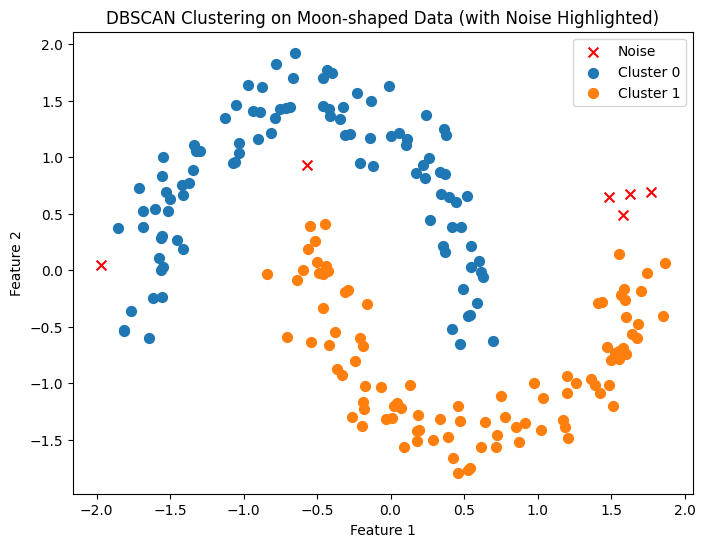

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Generate synthetic moon-shaped data
X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

# Step 2: Standardize the features using StandardScaler (optional but helps DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # You can adjust eps and min_samples
dbscan.fit(X_scaled)

# Step 4: Get the labels assigned by DBSCAN (noise points are labeled as -1)
labels = dbscan.labels_

# Step 5: Plotting the clusters and noise (outliers)
plt.figure(figsize=(8, 6))

# Loop through the unique labels and plot the clusters
for label in np.unique(labels):
    # Select points that belong to this label (cluster)
    cluster_points = X_scaled[labels == label]

    # If the label is -1, it represents noise, plot with a different color (e.g., red)
    if label == -1:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c='red', marker='x', label='Noise')
    else:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, label=f"Cluster {label}")

# Adding labels and title
plt.title("DBSCAN Clustering on Moon-shaped Data (with Noise Highlighted)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Show the plot
plt.show()


9. Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.
- To load the Wine dataset, reduce its dimensionality to 2D using PCA (Principal Component Analysis), apply Agglomerative Clustering, and visualize the results in a 2D scatter plot, follow the steps below:

- Steps:
   * Load the Wine dataset using sklearn.datasets.load_wine().
   * Reduce the dimensionality of the dataset to 2D using PCA.
   * Apply Agglomerative Clustering to the 2D data.
   * Visualize the results in a 2D scatter plot, coloring points based on their cluster labels.

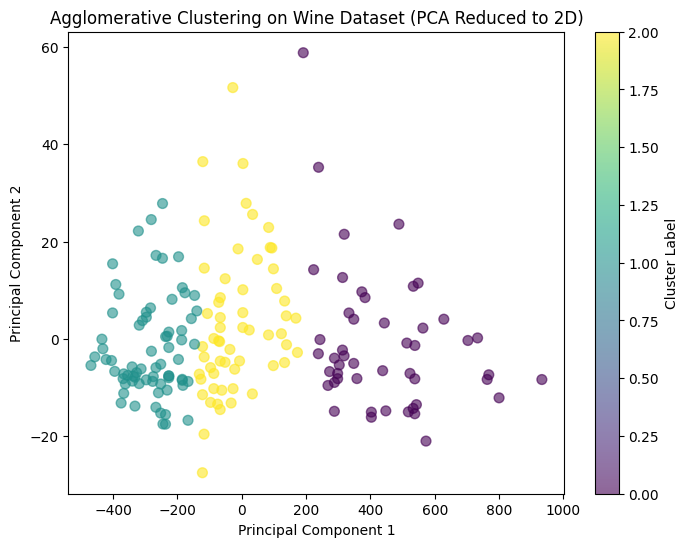

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data  # Features (independent variables)
y = wine.target  # Target labels (Wine class)

# Step 2: Reduce the dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 3: Apply Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3)  # 3 clusters (as the wine dataset has 3 classes)
labels = agg_clust.fit_predict(X_pca)

# Step 4: Visualize the results in a 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)

# Adding the title and labels
plt.title('Agglomerative Clustering on Wine Dataset (PCA Reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')

# Show the plot
plt.show()


10. You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories.
- Describe your real-world data science workflow using clustering:
- Which clustering algorithm(s) would you use and why?
- How would you preprocess the data (missing values, scaling)?
- How would you determine the number of clusters?
- How would the marketing team benefit from your clustering analysis?

- Real-World Data Science Workflow for Clustering: E-commerce Customer Segmentation
  * In your role as a data analyst at an e-commerce company tasked with segmenting customers based on their purchasing behavior, you can use clustering techniques to identify groups of customers with similar behaviors. These segments can then be targeted with personalized promotions or product recommendations.

- Choosing the Clustering Algorithm(s)
  * The clustering algorithm chosen will depend on the structure and characteristics of the data. Some potential algorithms to consider are:

  *  K-Means Clustering
     * Why: K-Means is one of the most widely used clustering algorithms due to its simplicity, scalability, and effectiveness when the clusters are well-separated and spherical. It works best when you have a relatively homogeneous set of features and the clusters are roughly of similar size.

     * Use case: If the customer segments are distinct and have well-defined boundaries (e.g., price-sensitive vs. high-end buyers, or frequent buyers vs. occasional buyers), K-Means could be a good fit.    

  * DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
     * Why: DBSCAN works well if the clusters have irregular shapes or densities. It is also excellent at detecting outliers (noise). Unlike K-Means, DBSCAN does not require you to pre-specify the number of clusters. It works well when there are noise points (i.e., customers with very sparse or inconsistent purchasing behavior).

      * Use case: If the customer segments are not well-separated or are expected to be irregular, DBSCAN would allow us to identify meaningful clusters without needing to specify the number of clusters in advance.  

  *  Agglomerative Clustering
      * Why: Agglomerative hierarchical clustering is a more flexible option that does not require the number of clusters to be specified upfront. It works by iteratively merging the closest clusters. It is useful for understanding hierarchical relationships between segments (e.g., major customer groups and their subgroups).

     * Use case: If you want to understand the relationships between customers at different levels (e.g., large segments vs. small sub-segments), agglomerative clustering might be helpful.  

  * Data Preprocessing
     * Effective preprocessing is key to the success of any clustering analysis. In the case of e-commerce customer data, the data will likely include demographic information (age, location, income, etc.) and purchasing behavior across categories (number of purchases, total spend, product categories bought, etc.).

  * Handling Missing Values
     * Approach:

     * Impute missing values for numerical columns (e.g., income, total purchases) using the mean or median (for numerical features) or the mode (for categorical features).

     * Remove rows with too many missing values, especially if they are irrelevant to the analysis.

     * For categorical data with missing values, you could impute with the most frequent category or a placeholder category if that makes sense for your context.  

  * Feature Engineering
     * Categorical Variables:

     * One-Hot Encoding: Convert categorical variables such as location, gender, or purchase category into numerical representations using one-hot encoding.

     * For product categories, consider creating dummy variables that represent whether a customer has purchased from specific categories (e.g., electronics, clothing, etc.).

    * Derived Features:

    * RFM Analysis (Recency, Frequency, Monetary): Create features that measure the recency of a customer’s last purchase, how often they make purchases, and how much they spend in total. These features are commonly used in customer segmentation.

    * Total spend per category: Create features that represent total spending or frequency in each product category (e.g., total spend in electronics, clothing, etc.).       

 * Scaling the Data
    * Standardization (Scaling): Many clustering algorithms (especially K-Means) are sensitive to the scale of the data. Standardize all numerical features using StandardScaler to ensure they are on the same scale (mean = 0, standard deviation = 1).

    * Min-Max Scaling: Alternatively, use Min-Max Scaling if you want to scale the data between 0 and 1. This is especially important when features have different units (e.g., income in thousands vs. number of purchases).

 * Handling Outliers
    * DBSCAN inherently identifies outliers, but for K-Means, you may need to handle outliers explicitly before running the algorithm. Outliers could be customers with extremely high spending or those who make very few purchases.   

- Determining the Number of Clusters
   * To determine the optimal number of clusters, you could use the following methods:

   * Elbow Method (for K-Means)
      * How: Run the K-Means clustering algorithm for a range of cluster values (e.g., from 1 to 10 clusters). Calculate the WCSS (Within-Cluster Sum of Squares) and plot it against the number of clusters.

      * Interpretation: Look for the "elbow" point in the plot where the rate of decrease in WCSS slows down. The number of clusters at the elbow is typically considered the optimal number.

   * Silhouette Score
      * How: The Silhouette Score measures how similar each point is to its own cluster compared to other clusters. A score closer to +1 indicates that the point is well-clustered, while a score close to -1 indicates that it might be assigned to the wrong cluster.

      * Use: Evaluate different values of K and choose the one with the highest average silhouette score.     

   * DBSCAN (No Need to Specify Clusters)
      * How: In DBSCAN, you do not need to predefine the number of clusters. Instead, the algorithm discovers clusters based on density. The eps (maximum distance between points) and min_samples (minimum number of points required to form a dense region) parameters control how the clusters are formed.

      * Use: DBSCAN will label noise points as -1 and form clusters from the remaining data.     

- How the Marketing Team Benefits from Clustering Analysis
   * Once the customer segments are identified, the marketing team can leverage the results to run more targeted and effective promotions:

   * Tailored Marketing Campaigns
       * Customers who exhibit similar purchasing behavior can be grouped together. For example:

       * Frequent shoppers can be targeted with loyalty programs or special offers.

       * High-spending customers could receive exclusive discounts or invitations to VIP events.

       * Occasional shoppers might be encouraged with discount offers to increase their purchasing frequency.   

   * Personalized Recommendations
       * Identifying churn-risk segments (e.g., customers who made only a few purchases or haven't purchased in a while) allows the marketing team to create targeted retention strategies.

       * Promotions tailored to inactive customers (e.g., offering a time-limited discount) can increase their engagement and boost retention.       

   * Budget Allocation for Promotions
      * The marketing team can allocate budgets more efficiently by focusing on the most profitable or high-potential segments. For example, high-value customer segments can receive a larger share of the marketing budget for personalized ads.

  * Identifying Cross-Selling Opportunities
     * Clustering helps identify product affinities. For example, if a segment of customers frequently buys electronics and accessories together, marketing can bundle these products and offer discounts on the combination.     